<a href="https://colab.research.google.com/github/akiumiann/googlecolab/blob/main/%E5%8F%B0%E5%BD%A2%E5%85%AC%E5%BC%8F%E3%81%8A%E3%82%88%E3%81%B3%E3%82%B7%E3%83%B3%E3%83%97%E3%82%BD%E3%83%B3%E5%85%AC%E5%BC%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

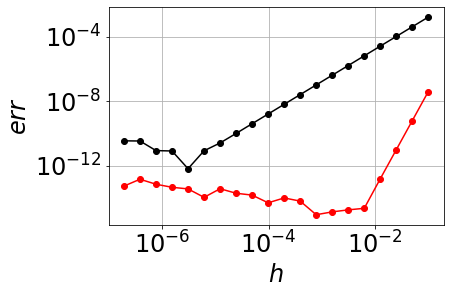

In [ ]:
def fx(x_in):
  y_result = 4.0/(1.0+x_in**2)
  return y_result

def calc1_S(N_in):#台形公式
  S = 0.0
  dx = 1.0/N_in
  x1_i = 0.0
  for i in range(N_in):
    x2_i = x1_i + dx
    S += (dx/2) * (fx(x1_i) + fx(x2_i))
    x1_i += dx
  return S

def calc2_S(N_in):#シンプソン公式
  S = 0.0
  dx = 1.0/N_in
  x1_i = 0.0
  for i in range(0,N_in-1,2):
    x1_i = dx * i
    x2_i = dx * (i+1)
    x3_i = dx * (i+2)
    S += (dx/3)*(fx(x1_i)+4*fx(x2_i)+fx(x3_i))
  return S

N_ini = 10
N_fac = 2
m = 20

S1_all = np.zeros(m)
S2_all = np.zeros(m)
h1_all = np.zeros(m)
h2_all = np.zeros(m)
err1_all = np.zeros(m)
err2_all = np.zeros(m)
N = N_ini
h = 1.0/N

for i in range(m):
  S1_all[i] = calc1_S(N)
  h1_all[i] = h
  err1_all[i] = abs(np.pi - S1_all[i])
  N = N * N_fac
  h = 1/N

N_ini = 10
N = N_ini
h = 1.0/N

for i in range(m):
  S2_all[i] = calc2_S(N)
  h2_all[i] = h
  err2_all[i] = abs(np.pi - S2_all[i])
  N = N * N_fac
  h = 1/N

plt.rcParams["font.size"] = 24
plt.plot(h1_all, err1_all, label=r"$err_N = |\pi - S_N| $", marker="o", color="black")#台形公式
plt.plot(h2_all, err2_all, label=r"$err_N = |\pi - S_N| $", marker="o", color="red") #シンプソン公式
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$h$")
plt.ylabel("$err$")
plt.grid()